In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import shapefile as shp

In [120]:
ciudades = pd.read_csv("geo_prueba.csv",encoding="ISO-8859-1")

In [76]:
ciudades

,city,page_uniques
0,Torreon,2118
1,San Luis Potosi,3772
2,Ecatepec De Morelos,3154
3,Matamoros,297
4,Oaxaca De Juarez,1159
...,...,...
910,Luvianos,4
911,Angangueo,2
912,Zacatepec De Hidalgo,1
913,Nuevo Progreso,1


In [119]:
ciudades["city"] = ciudades["city"].str.upper()

In [3]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (15,10)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'b')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [4]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [16]:
asf = shp.Reader("Mexico_Urban_Areas.shp",encoding="ISO-8859-1")
areas_Mexico =  read_shapefile(asf)
areas_Mexico

,OBJECTID,CITY,MUNICIPLTY,STATE,coords
0,1,TIJUANA,TIJUANA,BAJA CALIFORNIA,"[(-116.87804394268122, 32.54230238368538), (-1..."
1,2,TECATE,TECATE,BAJA CALIFORNIA,"[(-116.59862437689812, 32.571395999941075), (-..."
2,3,MEXICALI,MEXICALI,BAJA CALIFORNIA,"[(-115.37791145506641, 32.66245044792393), (-1..."
3,4,SANTA ISABEL,MEXICALI,BAJA CALIFORNIA,"[(-115.57369142577593, 32.64678042897413), (-1..."
4,5,PROGRESO,MEXICALI,BAJA CALIFORNIA,"[(-115.57519685665997, 32.59689131361723), (-1..."
...,...,...,...,...,...
881,887,SAN PEDRO POCHUTLA,SAN PEDRO POCHUTLA,OAXACA,"[(-96.46309315058437, 15.74604357763689), (-96..."
882,888,MAPASTEPEC,MAPASTEPEC,CHIAPAS,"[(-92.88610615921894, 15.44604913363565), (-92..."
883,889,HUIXTLA,HUIXTLA,CHIAPAS,"[(-92.45403073507194, 15.1487549917342), (-92...."
884,890,TAPACHULA,TAPACHULA,CHIAPAS,"[(-92.2530242302571, 14.902242314382505), (-92..."


In [80]:
unidas = ciudades.merge(areas_Mexico,how="inner",left_on='city',right_on='CITY')

In [81]:
unidas

,city,page_uniques,OBJECTID,CITY,MUNICIPLTY,STATE,coords
0,MATAMOROS,297,121,MATAMOROS,MATAMOROS,CHIHUAHUA,"[(-105.58269348391703, 26.77080908975904), (-1..."
1,MATAMOROS,297,189,MATAMOROS,MATAMOROS,COAHUILA DE ZARAGOZA,"[(-103.22251955490805, 25.517963316600387), (-..."
2,CABO SAN LUCAS,802,258,CABO SAN LUCAS,"CABOS, LOS",BAJA CALIFORNIA SUR,"[(-109.92857230596593, 22.901157265563363), (-..."
3,CHIHUAHUA,3113,66,CHIHUAHUA,CHIHUAHUA,CHIHUAHUA,"[(-106.14135606896235, 28.736564104582985), (-..."
4,SAN MIGUEL DE ALLENDE,374,390,SAN MIGUEL DE ALLENDE,ALLENDE,GUANAJUATO,"[(-100.73284284668755, 20.910408509484554), (-..."
...,...,...,...,...,...,...,...
280,ALAMO,14,386,ALAMO,TEMAPACHE,VERACRUZ DE IGNACIO DE LA LLAVE,"[(-97.6701929298442, 20.914402085341585), (-97..."
281,TANTOYUCA,8,346,TANTOYUCA,TANTOYUCA,VERACRUZ DE IGNACIO DE LA LLAVE,"[(-98.22115949166026, 21.360343523339843), (-9..."
282,ALAMOS,3,105,ALAMOS,ALAMOS,SONORA,"[(-108.94185502423666, 27.03163914603637), (-1..."
283,NUEVO PROGRESO,1,143,NUEVO PROGRESO,RIO BRAVO,TAMAULIPAS,"[(-97.94301551103422, 26.056857688264557), (-9..."


In [92]:
ciudades = ciudades.dropna()

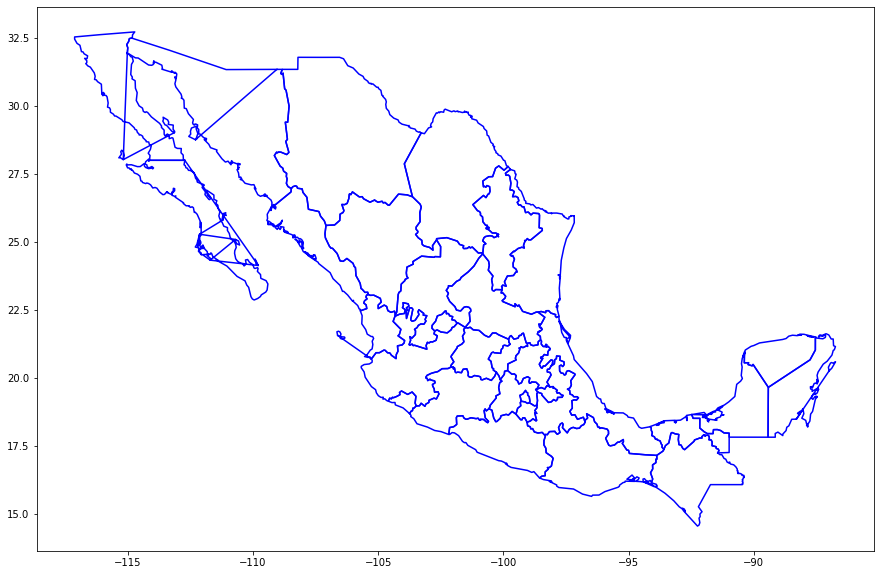

In [6]:
estados = shp.Reader("México_Estados.shp",encoding="ISO-8859-1")
plot_map(estados,"blue")

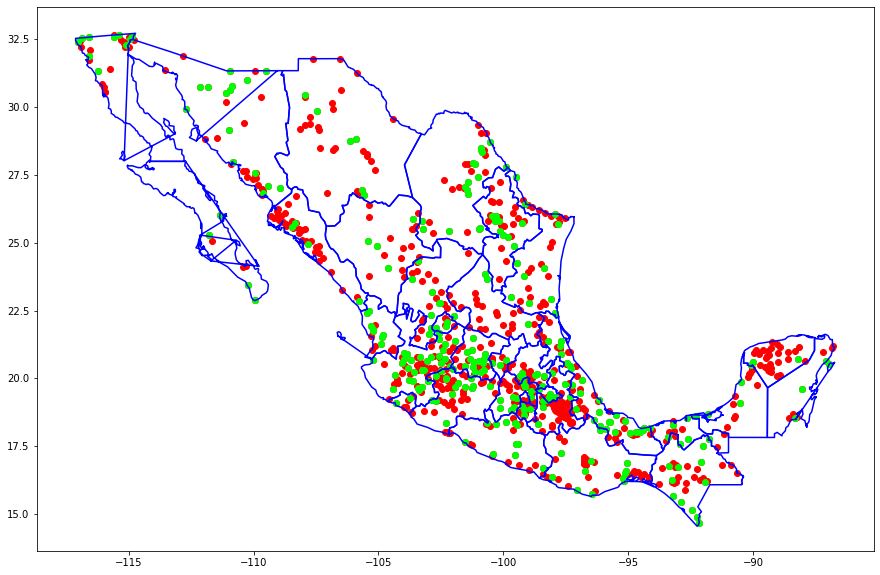

In [65]:
plot_map(estados,"blue")
areas_Mexico =  read_shapefile(asf)
for i in range(0,len(areas_Mexico)):
    plt.scatter(areas_Mexico.coords[i][0][0],areas_Mexico.coords[i][0][1],color="red")
    #el eje x es areas_Mexico.coords[i][0][0]
for i in range(0,len(unidas)):
    plt.scatter(unidas.coords[i][0][0],unidas.coords[i][0][1],color="lime")
    #el eje x es areas_Mexico.coords[i][0][0]

In [93]:
ciudades
ciudades[ciudades.city.str.contains("ACAPULCO")]

,city,page_uniques
37,ACAPULCO DE JUAREZ,143
798,ACAPULCO,1112


In [ ]:
#Levenshtein Distance (Procesamiento del lenguaje natural)

In [60]:
def distancia(s, t, ratio_calc = True):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [61]:
distancia("holi","crayoli")

0.5454545454545454

In [110]:
lista = []
for i in range(len(areas_Mexico)):
    if(distancia(ciudades["city"][0], areas_Mexico["CITY"][i])>0.8):
        print(ciudades["city"][0], areas_Mexico["CITY"][i])

TORREON TORREÓN


In [121]:
ciudades = ciudades.fillna("Hola")

In [122]:
ciudades["city"][458]

'Hola'

In [141]:
lista = []
for i in range(len(areas_Mexico["CITY"])):
    for a in range(len(ciudades["city"])):
        if(distancia(ciudades["city"][a].upper(), areas_Mexico["CITY"][i].upper())>0.75):
            #print(ciudades["city"][a].upper(), areas_Mexico["CITY"][i].upper())
            tupla = (areas_Mexico.coords[i][0][0], areas_Mexico.coords[i][0][1])
            lista.append( (areas_Mexico.coords[i][0][0], areas_Mexico.coords[i][0][1]))
            #print(areas_Mexico.coords[i][0][0])
            #plt.scatter(areas_Mexico.coords[i][0][0],areas_Mexico.coords[i][0][1],color="yellow")

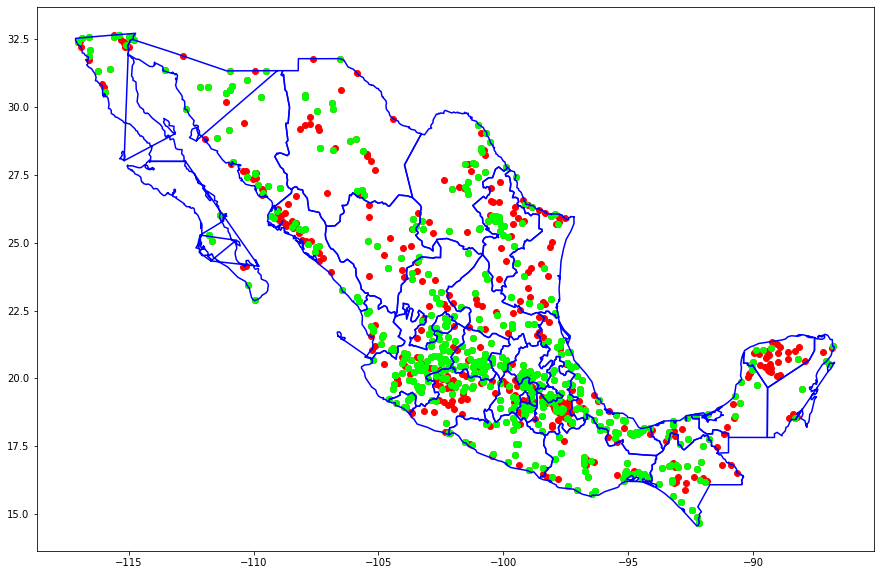

In [142]:
plot_map(estados,"blue")
for i in range(0,len(areas_Mexico)):
    plt.scatter(areas_Mexico.coords[i][0][0],areas_Mexico.coords[i][0][1],color="red")
    #el eje x es areas_Mexico.coords[i][0][0]
for i in range(0,len(lista)):
    plt.scatter(lista[i][0],lista[i][1],color="lime")
    #el eje x es areas_Mexico.coords[i][0][0]